In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
# pNotes = pd.read_csv("patient_notes.csv")
training = pd.read_csv("train.csv", na_values="[]")
pNotes = pd.read_csv("patient_notes.csv")
feat = pd.read_csv("features.csv")
training[training.pn_num == 16]

,id,case_num,pn_num,feature_num,annotation,location
0,00016_000,0,16,0,['dad with recent heart attcak'],['696 724']
1,00016_001,0,16,1,"['mom with ""thyroid disease']",['668 693']
2,00016_002,0,16,2,['chest pressure'],['203 217']
3,00016_003,0,16,3,"['intermittent episodes', 'episode']","['70 91', '176 183']"
4,00016_004,0,16,4,['felt as if he were going to pass out'],['222 258']
5,00016_005,0,16,5,NaN,NaN
6,00016_006,0,16,6,"['adderall', 'adderrall', 'adderrall']","['321 329', '404 413', '652 661']"
7,00016_007,0,16,7,NaN,NaN
8,00016_008,0,16,8,NaN,NaN
9,00016_009,0,16,9,"['palpitations', 'heart beating/pounding']","['26 38', '96 118']"


In [7]:
print(training.shape)
training.isnull().sum()

(14300, 6)


id                0
case_num          0
pn_num            0
feature_num       0
annotation     4399
location       4399
dtype: int64

In [202]:
training.groupby("case_num").case_num.apply(pd.Series.value_counts)

case_num   
0         0    1300
1         1    1300
2         2    1700
3         3    1600
4         4    1000
5         5    1800
6         6    1200
7         7     900
8         8    1800
9         9    1700
Name: case_num, dtype: int64

In [203]:
training.loc[(training.feature_num == 6) & (training.annotation != "[]")].head(20)

,id,case_num,pn_num,feature_num,annotation,location
6,00016_006,0,16,6,"['adderall', 'adderrall', 'adderrall']","['321 329', '404 413', '652 661']"
32,00046_006,0,46,6,"['adderall', 'Adderall']","['380 388', '730 738']"
45,00082_006,0,82,6,['aderall'],['389 396']
58,00100_006,0,100,6,['adderall'],['595 603']
84,00188_006,0,188,6,"['aderol', 'aderol', 'aderol']","['457 463', '507 513', '655 661']"
97,00211_006,0,211,6,['Adderall'],['595 603']
110,00224_006,0,224,6,['adderral'],['555 563']
123,00225_006,0,225,6,['adderall'],['689 697']
136,00234_006,0,234,6,['adderall'],['396 404']
149,00331_006,0,331,6,['Adderall'],['477 485']


In [204]:
pn_16 = pNotes[pNotes.pn_num == 16].pn_history.str
print(pn_16[321: 329])

16    adderall
Name: pn_history, dtype: object


In [205]:
training.loc[training.case_num == 0]

,id,case_num,pn_num,feature_num,annotation,location
0,00016_000,0,16,0,['dad with recent heart attcak'],['696 724']
1,00016_001,0,16,1,"['mom with ""thyroid disease']",['668 693']
2,00016_002,0,16,2,['chest pressure'],['203 217']
3,00016_003,0,16,3,"['intermittent episodes', 'episode']","['70 91', '176 183']"
4,00016_004,0,16,4,['felt as if he were going to pass out'],['222 258']
...,...,...,...,...,...,...
1295,02436_008,0,2436,8,[],[]
1296,02436_009,0,2436,9,"['chest palpitations', 'chest palpitations']","['71 89', '109 127']"
1297,02436_010,0,2436,10,['2-3 month'],['50 59']
1298,02436_011,0,2436,11,['17 year old'],['26 37']


In [206]:
pNotes[pNotes.case_num == 0]
pNotes.groupby("case_num").size()

case_num
0    2268
1     808
2    1958
3    9753
4    5405
5    6909
6    1597
7    4101
8    4196
9    5151
dtype: int64

In [207]:
training

,id,case_num,pn_num,feature_num,annotation,location
0,00016_000,0,16,0,['dad with recent heart attcak'],['696 724']
1,00016_001,0,16,1,"['mom with ""thyroid disease']",['668 693']
2,00016_002,0,16,2,['chest pressure'],['203 217']
3,00016_003,0,16,3,"['intermittent episodes', 'episode']","['70 91', '176 183']"
4,00016_004,0,16,4,['felt as if he were going to pass out'],['222 258']
...,...,...,...,...,...,...
14295,95333_912,9,95333,912,[],[]
14296,95333_913,9,95333,913,[],[]
14297,95333_914,9,95333,914,['photobia'],['274 282']
14298,95333_915,9,95333,915,['no sick contacts'],['421 437']


In [253]:
# son_died = training.loc[(training.feature_num == 801) & (training.annotation != "[]")]
# list(son_died.annotation)

def find_context(row):
    loc = r'(\d+) (\d+)'
    m = re.search(loc, row.location)
    i, j = map(int, m.group().split())
    row["context"] = row.pn_history[:j + min(20, len(row.pn_history))]
    return row

def generate_context(feature_num):
    female_1 = training.loc[(training.feature_num == feature_num) & (training.annotation != "[]")]
    female_notes = pNotes.set_index("pn_num").loc[female_1.pn_num].pn_history
    female_df = female_1[["pn_num", "annotation", "location"]].join(female_notes, on="pn_num")
    
    female_df_cont = female_df.apply(find_context, axis="columns")
    return female_df_cont


all_context = generate_context(000)
all_context

,pn_num,annotation,location,pn_history,context
0,16,['dad with recent heart attcak'],['696 724'],HPI: 17yo M presents with palpitations. Patien...,HPI: 17yo M presents with palpitations. Patien...
26,46,['father: heart attack'],['824 844'],Mr. Cleveland is a 17yo M who was consented by...,Mr. Cleveland is a 17yo M who was consented by...
39,82,['Father MI'],['622 631'],17 yo M w/ no cardiac or arrhythmia PMH presen...,17 yo M w/ no cardiac or arrhythmia PMH presen...
52,100,['Dad-MI'],['735 741'],HPI: Dillon Cleveland is an otherwise healthy ...,HPI: Dillon Cleveland is an otherwise healthy ...
65,161,['father had acute MI'],['601 620'],"17 y/o M , Dillon Cleveland comes with c/o of ...","17 y/o M , Dillon Cleveland comes with c/o of ..."
...,...,...,...,...,...
1222,2308,['Dad had MI'],['909 919'],17 yo male with no significant PMH presenting ...,17 yo male with no significant PMH presenting ...
1235,2315,['father MI'],['750 756;761 763'],17 yo M who presents with episodes of heart pa...,17 yo M who presents with episodes of heart pa...
1261,2428,['father heart attack'],['589 595;606 618'],dillon cleveland is a 17yo male with no PMH th...,dillon cleveland is a 17yo male with no PMH th...
1274,2430,['MI father'],['845 847;855 861'],Mr. Cleveland is a 17 yo male who presents wit...,Mr. Cleveland is a 17 yo male who presents wit...


In [254]:
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(all_context['annotation'])
# print(data.toarray())
# print(cv.get_feature_names())
text_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
text_dtm.index=all_context.index
word_freq = text_dtm.sum()
word_freq.sort_values(ascending=False).head(20)


father      64
mi          53
heart       35
had         31
attack      28
dad         26
with        11
an           7
in           4
recent       4
problem      4
has          3
of           2
for          2
his          2
recently     2
hx           2
52           1
possible     1
positive     1
dtype: int64

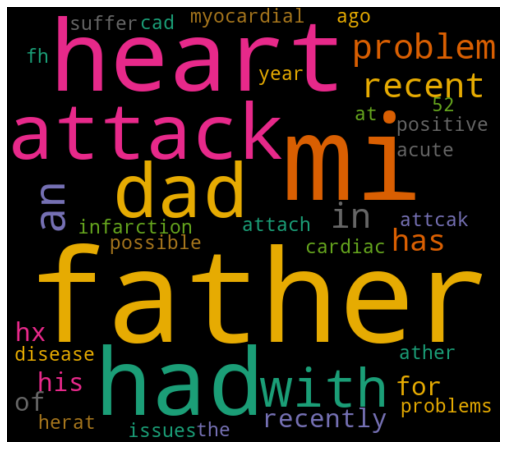

In [255]:

#Get the wordcloud shitter
wc = WordCloud(width=600, height=530, max_words=150,colormap="Dark2").generate_from_frequencies(word_freq)
plt.figure(figsize=(10,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [217]:

all_context_text = all_context.annotation.sum()[1:-1].split("][")
all_context_text = "\n".join(all_context_text).replace("\'", "")
all_context_text

'lmp 2 weeks ago\nlast period 2 weeks ago\nLast period was 2 weeks ago\nLMP 2 weeks ago\nLMP 2 WEEKS\nLMP 2/52 ago\nLMP was 2 weeks ago\nLMP 2 weeks ago\nLMP 2 weeks ago\nLMP 2 weeks ago\nLMP was 2 weeks ago\nlast mestrual period was 2 weeks ago\nLMP 2 weeks ago\nLMP was 2 weeks ago\nLAP 2 weeks ago\nLMP was 2 weeks ago, LMP 2 weeks ago\nlmp 2 weeks ago\nLMP- 2 WEEK AGO\nLMP 2wk\nLMP 2 weeks ago\nLMP 2 WEEKS BACK\nlast menstrual period was 2 weeks ago\nLMP 2 wks ago\nLMP 2 weeks ago\nLMP 2 weeks ago\nlast menstrual period 2 weeks ago\nLMP was 2 weeks ago\nLMP 2 weeks\nLMP was 2wk ago\nLMP 2 weeks ago\nLMP starting 2 weeks ago\nLMP 2 weeks ago\nLMP 2weeks ago\nLMP was 2weeks\nLMP 2 weeks ago\nLMP 2 WEEKS AGO\nLast menstrual perior 2 weeks ago\nLMP ; 2 weeks ago\nlast mentrual period was 2 weeks ago\nLMP 2 weeks ago\nLMP 2 weeks ago\nLast menstrual period was 2 weeks ago and normal, Last menstrual period was 2 weeks ago\nLast MP- 2 wk ago\nLMP 2weeks ago\nLMP 2 weeks ago\nLMP 2 weeks ago

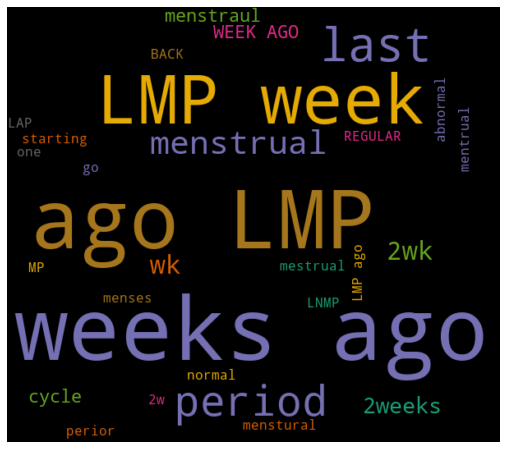

In [218]:

wc = WordCloud(width=600, height=530, max_words=150,colormap="Dark2").generate(all_context_text)
plt.figure(figsize=(10,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
# feature_nums = list(range(0, 2))
# for feature_num in feature_nums:
#     print(generate_context(feature_num))

In [1]:
print("test")

test
